<a href="https://colab.research.google.com/github/JuanDaGue/MachineLearning/blob/main/Regresi%C3%B3n_MultiLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pylab as plt
from numpy import math
from scipy.optimize import curve_fit
import seaborn as sns
from scipy import stats
from scipy.stats import *
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize
#!pip install emcee
#!pip install corner
#import emcee
import seaborn as sns
#import corner

<ipython-input-3-8f5ce4c5caef>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [4]:
from google.colab import files
uploaded=files.upload()

Saving housing.data to housing.data


#Lineal regrassion


'DIS': distance

'CRIM': crim rate

'INDUST': industry

'RM': Rooms means

'MEDV': Median of the prices

In [5]:
import pandas as pd
df=pd.read_csv('housing.data',header=None,delim_whitespace=True)
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']


In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#Headmap

correlation matrix

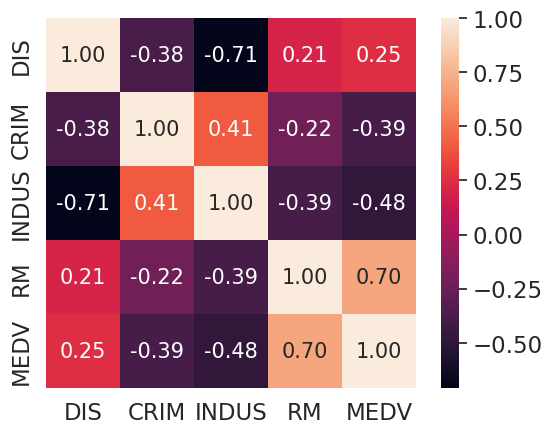

In [ ]:
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

#Create the  mothel with sklearn

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=df[['RM','INDUS']].values
y=df['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_train_predict=lin_reg.predict(X_train_scaled)
y_test_predict=lin_reg.predict(X_test_scaled)
mse_train=mean_squared_error(y_train,y_train_predict)
mse_test=mean_squared_error(y_test,y_test_predict)
print(mse_train,mse_test)


41.78549914483774 33.41761995432786


In [18]:
X=df[['RM','INDUS']].values
y=df['MEDV'].values

#standarized  x and y values

sc_x =StandardScaler()
sc_y =StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1))

slg=LinearRegression()
slg.fit(x_std,y_std)
print(slg.intercept_,slg.coef_)
a,b=slg.intercept_,slg.coef_


[-4.01944784e-16] [[ 0.59756962 -0.24967157]]


#Analise and graphics

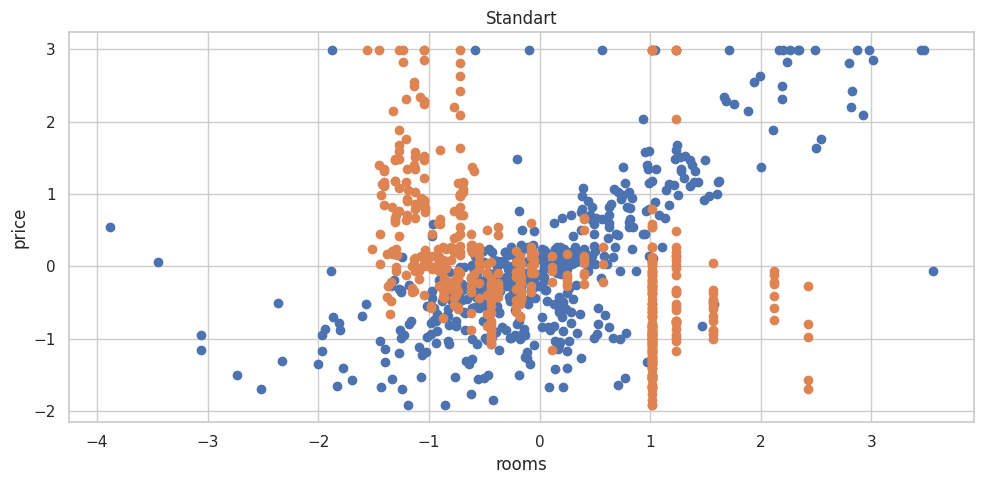

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(x_std,y_std,'o')
plt.xlabel('rooms')
plt.ylabel('price')
plt.title('Standart')
plt.tight_layout()

In [ ]:
!pip install plotly


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



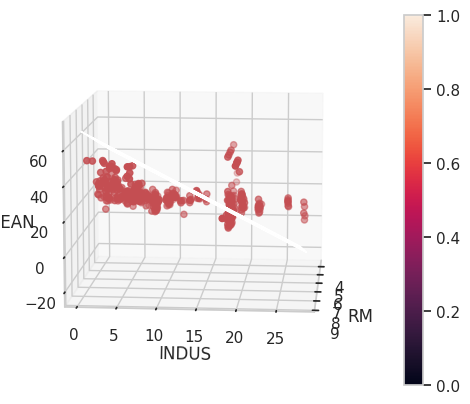

In [92]:

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
#Create the mesh
x1_range = np.linspace(df['RM'].min(), df['RM'].max(), 10)
x2_range = np.linspace(df['INDUS'].min(), df['INDUS'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
plane=np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
plane=pd.DataFrame(plane,columns=['RM','INDUS'])
#Predict the values
y_grid = slg.predict(plane).reshape(x1_grid.shape)
y_grid = sc_y.inverse_transform(y_grid)
# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(df['RM'],df['INDUS'],df['MEDV'], c='r', marker='o')
#surf = ax.scatter(x_std[:, 1],x_std[:, 0],y_std, c='b', marker='^')
scatter1=ax.plot_surface(x1_grid, x2_grid, y_grid, color='b', alpha=0.5)
# Plot the data

# Add labels
ax.set_xlabel('RM')
ax.set_ylabel('INDUS')
ax.set_zlabel('MEAN')

# Add a legend
#ax.legend(['Sine Surface'])

# Add a color bar which maps values to colors
fig.colorbar(surf)
ax.view_init(elev=10, azim=5)  # Adjust these values as needed


plt.show()


First predictions

In [100]:
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression



# Create a meshgrid for plotting the plane
x1_range = np.linspace(df['RM'].min(), df['RM'].max(), 10)
x2_range = np.linspace(df['INDUS'].min(), df['INDUS'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
plane=np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
plane=pd.DataFrame(plane,columns=['RM','INDUS'])
#Predict the values
y_grid = slg.predict(plane).reshape(x1_grid.shape)
y_grid = sc_y.inverse_transform(y_grid)

# Create the scatter plot
scatter1 = go.Scatter3d(x=df['RM'],y=df['INDUS'],z=df['MEDV'], mode='markers', marker=dict(color='red', size=3), name='X1')
scatter2 = go.Scatter3d(x=df['INDUS'],y=df['RM'],z=df['MEDV'], mode='markers', marker=dict(color='blue', size=3), name='X2')

# Create the regression plane
plane = go.Surface(x=x1_grid, y=x2_grid, z=y_grid, colorscale='YlGnBu', opacity=0.5, name='Regression Plane')

# Create the layout
layout = go.Layout(scene=dict(
    xaxis_title='RM',
    yaxis_title='INDUS',
    zaxis_title='MEAN'
))

# Create the figure
fig = go.Figure(data=[scatter1, scatter2, plane], layout=layout)

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

